**Connect google drive**

In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Wed Dec  6 10:08:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 1695884081.2863135
 1695884081.3142548
 1695884126.3520193
 1695884126.3613842
 annotaion_person_draw0.zip
 annotaion_person_draw.zip
 Audio2Head
 chip1.py
 coco_person_car_yolov4_22000.weights
'Colab Notebooks'
 config.json
'Copy of Copy of Copy of yolov4-custom_TRAINING_vf.ipynb'
'Copy of Copy of custom_yoloV5.ipynb'
'Copy of Copy of productCount_final_custom_yolov3.ipynb'
 events.out.tfevents.1695884081.a48e7dd1b69d.18859.0
 events.out.tfevents.1695884126.a48e7dd1b69d.19062.0
 Face_Recognition
 fake_review
'Fraser (1).docx'
 Fraser.gdoc
 GAN
'Gan_model '
 indian_test_team.jpg
 kaggle.json
'Latest Screenshots.docx'
 LipGAN
 model.py
'My Drive'
 new_annotation
 preprocessor_config.json
 pretrained_models.zip
'Proposal for VA - FT.docx'
'Proposal for VA - FT - High level assumptions - feasibility  (1).gdoc'
'Proposal for VA - FT - High level assumptions - feasibility .gdoc'
 PySpark.gdoc
 scheduler_config.json
 speech-text_custom_train_all_pretrained
 task_h

**1) Clone the Darknet**



In [10]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.35 MiB | 16.25 MiB/s, done.
Resolving deltas: 100% (10670/10670), done.


**2) Compile Darknet using Nvidia GPU**


In [11]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: un

**3) Configure Darknet network for training YOLO V3**

In [12]:
!ls

3rdparty	darknet			Dockerfile.cpu	       Makefile       scripts
backup		DarknetConfig.cmake.in	Dockerfile.gpu	       net_cam_v3.sh  src
build		darknet_images.py	image_yolov3.sh        net_cam_v4.sh  vcpkg.json
build.ps1	darknet.py		image_yolov4.sh        obj	      vcpkg.json.opencv23
cfg		darknet_video.py	include		       package.xml    video_yolov3.sh
cmake		data			json_mjpeg_streams.sh  README.md      video_yolov4.sh
CMakeLists.txt	docker-compose.yml	LICENSE		       results


In [13]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [14]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 7000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [ ]:
# Create folder on google drive so that we can save there the weights
!mkdir "/mydrive/yolov3_iphone_scratch_detect"

mkdir: cannot create directory ‘/mydrive/yolov3_iphone_scratch_detect’: File exists


In [15]:
!echo "scratch" > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3_iphone_scratch_detect' > data/obj.data
!mkdir data/obj

In [16]:
!ls /mydrive/yolov3_iphone_scratch_detect/

classes.txt		    yolov3_iphone_scrtach_custom.ipynb	yolov3_training_1000.weights
iphone_scratch_dataset.zip  yolov3_testing.cfg			yolov3_training_last.weights


In [17]:

!cp cfg/yolov3_training.cfg /mydrive/yolov3_iphone_scratch_detect/yolov3_testing.cfg
!cp data/obj.names /mydrive/yolov3_iphone_scratch_detect/classes.txt

In [ ]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2023-12-05 15:01:58--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  95.5MB/s    in 1.6s    

2023-12-05 15:02:00 (95.5 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [18]:
!unzip /mydrive/yolov3_iphone_scratch_detect/iphone_scratch_dataset.zip -d data/obj

Archive:  /mydrive/yolov3_iphone_scratch_detect/iphone_scratch_dataset.zip
  inflating: data/obj/1_jpg.rf.f668a89bc2ae6bdcbe06a293c0b83a45.jpg  
  inflating: data/obj/1_jpg.rf.f668a89bc2ae6bdcbe06a293c0b83a45.txt  
  inflating: data/obj/11_jpg.rf.8bb461c1e7cf0c23d250cd982952e05e.jpg  
  inflating: data/obj/11_jpg.rf.8bb461c1e7cf0c23d250cd982952e05e.txt  
  inflating: data/obj/13_jpg.rf.20c1577a1933982566e6dc4aab7051cf.jpg  
  inflating: data/obj/13_jpg.rf.20c1577a1933982566e6dc4aab7051cf.txt  
  inflating: data/obj/15_jpg.rf.05bd889fd11b3ec55fea19bbae03b746.jpg  
  inflating: data/obj/15_jpg.rf.05bd889fd11b3ec55fea19bbae03b746.txt  
  inflating: data/obj/18_jpg.rf.536f0c5b0838c4d31a476d945e54a545.jpg  
  inflating: data/obj/18_jpg.rf.536f0c5b0838c4d31a476d945e54a545.txt  
  inflating: data/obj/2_jpg.rf.9dbe3c959798e384e6fe322542cd868a.jpg  
  inflating: data/obj/2_jpg.rf.9dbe3c959798e384e6fe322542cd868a.txt  
  inflating: data/obj/20_jpg.rf.834553036da69fa5c2be0ae37c124e21.jpg  
  infl

**6) Start the training**

In [19]:
import glob
images_list = glob.glob("data/obj/*.jpg")
print(images_list)
print(len(images_list))

['data/obj/45_jpg.rf.0988b2a8cbf211e30c99f60d1f6b80f6.jpg', 'data/obj/28_jpg.rf.8cb27fe83ad7584c113ac087e31f2956.jpg', 'data/obj/23_jpg.rf.859677adcfd5f7a9fcf0eb080b559f16.jpg', 'data/obj/22_jpg.rf.8fea7fed25730b4d1d9c32a32db83c86.jpg', 'data/obj/60_jpg.rf.cd67f5b13cb930fa5e4e7c4d6d27a44b.jpg', 'data/obj/40_jpg.rf.2f00b4f6bbabdd8dc97c730a48bc9e9d.jpg', 'data/obj/58_jpg.rf.48fa0ac8ccd772c9341209aace2592b5.jpg', 'data/obj/37_jpg.rf.b02aa41280d25cd44cc0ba86744c07eb.jpg', 'data/obj/3_jpg.rf.a42d8497d8ba1746b3e5d35c30fe6a45.jpg', 'data/obj/18_jpg.rf.536f0c5b0838c4d31a476d945e54a545.jpg', 'data/obj/42_jpg.rf.76df8482350e436deac5476e86805004.jpg', 'data/obj/52-_jpg.rf.e802d535f820829d2fd9b34587af255f.jpg', 'data/obj/13_jpg.rf.20c1577a1933982566e6dc4aab7051cf.jpg', 'data/obj/62_jpg.rf.a261511b812c611ca2641b468728bd1d.jpg', 'data/obj/57_jpg.rf.c15966fcb8dbe05036a9590c713cf545.jpg', 'data/obj/50_jpg.rf.bad86cff5a0b3b506f6e24cd39e61b00.jpg', 'data/obj/24_jpg.rf.c88c4a6c29ff0bc60b0d7b98357d7150.jp

In [20]:
with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

In [21]:
!ls

3rdparty	darknet			Dockerfile.cpu	       Makefile       scripts
backup		DarknetConfig.cmake.in	Dockerfile.gpu	       net_cam_v3.sh  src
build		darknet_images.py	image_yolov3.sh        net_cam_v4.sh  vcpkg.json
build.ps1	darknet.py		image_yolov4.sh        obj	      vcpkg.json.opencv23
cfg		darknet_video.py	include		       package.xml    video_yolov3.sh
cmake		data			json_mjpeg_streams.sh  README.md      video_yolov4.sh
CMakeLists.txt	docker-compose.yml	LICENSE		       results


In [22]:
!cp -r /content/gdrive/MyDrive/yolov3_iphone_scratch_detect/yolov3_training_1000.weights /content

In [ ]:
# Start the training
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show
!./darknet detector train data/obj.data cfg/yolov3_training.cfg /content/yolov3_training_1000.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000340, iou_loss = 0.000000, total_loss = 0.000340 
 total_bbox = 697627, rewritten_bbox = 0.091883 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.806874), count: 2, class_loss = 0.000034, iou_loss = 0.042870, total_loss = 0.042903 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.885848), count: 4, class_loss = 0.000064, iou_loss = 0.032639, total_loss = 0.032703 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 697633, rewritten_bbox = 0.091882 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.857541), count: 3, class_loss = 0.003826, iou_loss = 0.047618, total_loss = 0.051444 
v3 (m

In [ ]:
#testing
!ls "data/obj.data"

data/obj.data


In [ ]:
#prediction and testing

In [ ]:
!cp "/content/darknet" -r "/content/gdrive/MyDrive/yolov3_hair_detect"


In [ ]:
#!./darknet detector test "data/obj.data" "cfg/yolov3_training.cfg" "/content/gdrive/MyDrive/yolov3/yolov3_training_last.weights" '/content/gdrive/MyDrive/yolov3/pot0.jpg'

In [ ]:
!ls '/content/gdrive/MyDrive/yolov3_hair_detect'

classes.txt  pot10.jpg	pot5.jpg  yolov3_testing.cfg
images.zip   pot1.jpg	pot6.jpg  yolov3_training_1000.weights
obj.data     pot2.jpg	pot7.jpg  yolov3_training_last.weights
output	     pot3.jpg	pot8.jpg
pot0.jpg     pot4.jpg	pot9.jpg


In [ ]:
import cv2
import numpy as np
import glob
import random
from google.colab.patches import cv2_imshow
import imutils
weights ='/content/gdrive/MyDrive/yolov3_iphone_scratch_detect/yolov3_training_1000.weights'
cfg = '/content/gdrive/MyDrive/yolov3_iphone_scratch_detect/yolov3_testing.cfg'
#dataset ='/content/gdrive/MyDrive/yolov3/pot0.jpg'
# Load Yolo
net = cv2.dnn.readNet(weights, cfg)

# Name custom object
classes = ["scratch"]

# Images path
img_path = '/content/Datacluster Cracked Screen (172).jpg'


layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
#colors = np.random.uniform(0, 255, size=(len(classes), 3))


img = cv2.imread(img_path)
#img = cv2.resize(img, None, fx=0.4, fy=0.4)
#img =imutils.resize(img, width=640)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.1:
            # Object detected
            #print(class_id)
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        #color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0,0,255), 2)
        #cv2.putText(img, label, (x, y + 30), font, 3, color, 1)

print("no. of bounding boxes",len(indexes))
#cv2.imwrite("/content/gdrive/MyDrive/yolov3_hair_detect/output/out_test1.jpg", img)
cv2_imshow(img)


Output hidden; open in https://colab.research.google.com to view.

()
no. of bounding boxes 0


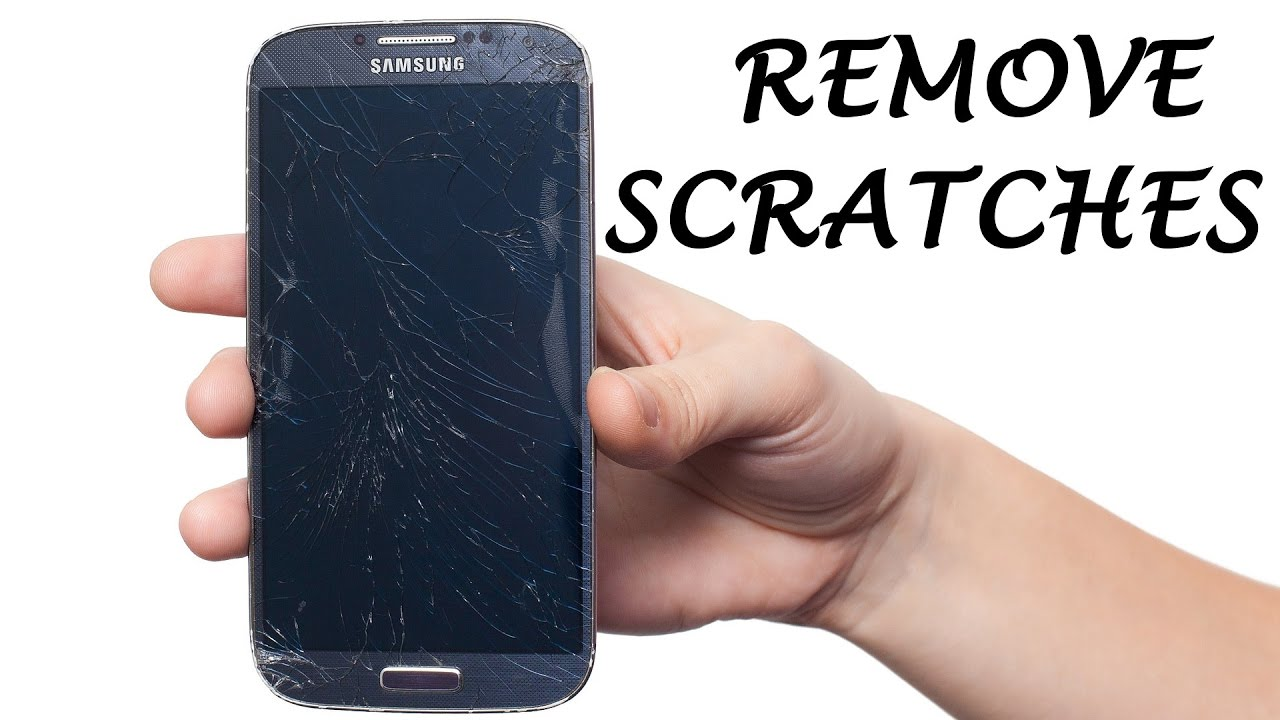

In [23]:
import cv2
import numpy as np
import glob
import random
from google.colab.patches import cv2_imshow
import imutils
weights ='/content/gdrive/MyDrive/yolov3_iphone_scratch_detect/yolov3_training_6000.weights'
cfg = '/content/gdrive/MyDrive/yolov3_iphone_scratch_detect/yolov3_testing.cfg'

#weights ='/content/gdrive/MyDrive/yolov3_iphone_scratch_detect/yolov3_training_1000.weights'
#cfg = '/content/gdrive/MyDrive/yolov3_iphone_scratch_detect/yolov3_testing_1000.cfg'

#dataset ='/content/gdrive/MyDrive/yolov3/pot0.jpg'
# Load Yolo
net = cv2.dnn.readNet(weights, cfg)

# Name custom object
classes = ["scratch"]

# Images path
#img_path = '/content/Datacluster Cracked Screen (172).jpg'
img_path ="/content/test9.jpg"

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
#colors = np.random.uniform(0, 255, size=(len(classes), 3))


img = cv2.imread(img_path)
# Resize the image for better visualization
max_display_width = 800
scale_factor = min(1.0, max_display_width / img.shape[1])
img = cv2.resize(img, (0, 0), fx=scale_factor, fy=scale_factor)
#img = cv2.resize(img, None, fx=0.4, fy=0.4)
#img =imutils.resize(img, width=640)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.1:
            # Object detected
            #print(class_id)
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        #color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), (0,0,255), 2)
        #cv2.putText(img, label, (x, y + 30), font, 3, color, 1)

print("no. of bounding boxes",len(indexes))
#cv2.imwrite("/content/gdrive/MyDrive/yolov3_hair_detect/output/out_test1.jpg", img)
cv2_imshow(img)
